In [1]:
import os

os.chdir(r'C:\Users\carlo\GitHub\ProjectBuffalo')

In [2]:
import pandas as pd
import numpy as np
import buffalo.algorithm.outliers as ol_algo 

In [3]:
import buffalo.predictor as predictor

## Apple Outlier Detection

In [4]:
testing_id = 1

In [5]:
model_performance = predictor.ModelPerformance.deserialize_from_file(r'cached_data/record.sqlite', testing_id=testing_id)

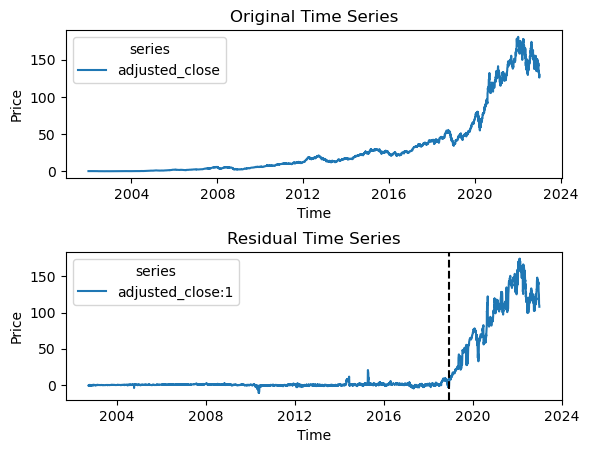

In [6]:
model_performance.plot_residuals()

In [7]:
ol_detection = ol_algo.IterativeTtestOutlierDetection(
    types= pd.DataFrame({'type': ['AO', 'IO', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC'], 'delta': [0, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}),
    maxit=4,
    maxit_iloop=4,
    maxit_oloop=4,
    cval=None,
    cval_reduce=0.14286,
    discard_method='bottom-up',
    discard_cval=3.5,
    tsmethod='ARIMA',
    args_tsmethod={
        "order": (1,1,1),
        "seasonal_order": (0, 0, 0, 0),
        "with_intercept": True
    }
)

In [9]:
ol_detection_result = ol_detection.fit(endog=pd.concat((model_performance.training_residuals, model_performance.testing_residuals))['adjusted_close:1'], exog=None)

C:\Users\carlo\GitHub\ProjectBuffalo\buffalo\algorithm\outliers.py:675: UserWarning: Maximum number of iterations reached for inner loop.
  warn('Maximum number of iterations reached for inner loop.')
c:\Users\carlo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
c:\Users\carlo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
c:\Users\carlo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
c:\Users\carlo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self.

In [10]:
ol_detection_result.serialize_to_file(sql_path=r'cached_data/ol_detection_result.sqlite', dataset_name=f'testing_id_{testing_id}', algo_name='VC not included')

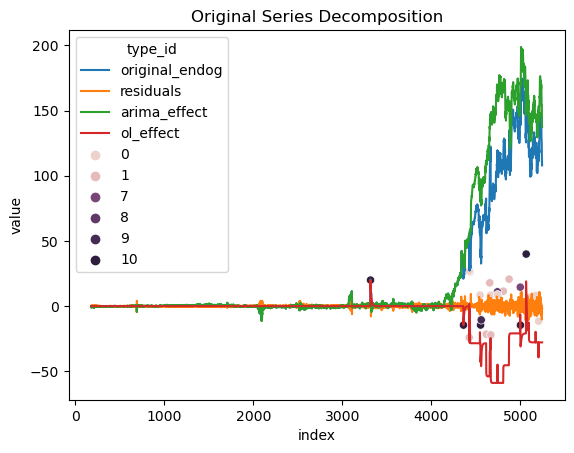

In [11]:
ol_detection_result.plot_series_decomposition()

In [12]:
ol_detection_result.located_ol

,type_id,id,type,residuals,t_index,coefhat,tstat,delta,min_n
0,10,735,TC,40.687536,4884,39.9201,28.192161,0.9,NaN
1,0,262,AO,26.460535,4253,26.1404,68.251697,0.0,NaN
2,0,256,AO,24.160963,4245,26.9017,60.453258,0.0,NaN
3,1,1079,IO,-24.473460,4244,-24.1022,-42.358875,0.0,NaN
4,1,1180,IO,-22.241006,4436,-21.5255,-27.882772,0.0,NaN
5,1,1225,IO,-22.194000,4487,-22.0914,-28.877647,0.0,NaN
6,1,1401,IO,21.406594,4692,20.7025,21.364809,0.0,NaN
7,10,842,TC,19.908945,3137,19.9522,35.565419,0.9,NaN
8,7,1511,TC,16.769266,4818,14.5404,5.851268,0.6,NaN
9,10,1513,TC,-17.226514,4820,-14.6339,-8.463794,0.9,NaN
